####  (b) Take a grayscale image of size 512x512, differentiate the results of power law & inverse logarithmic transformation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Loading the original image

shape of the image: (976, 746)


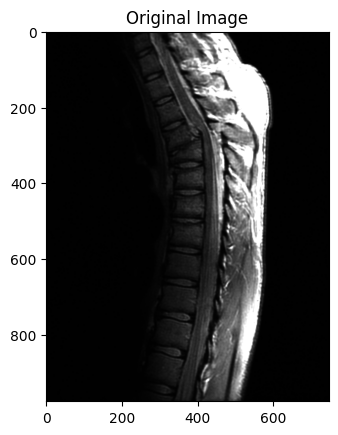

min pixel intensity: 0
max pixel intensity: 255


In [33]:
original_image = cv2.imread('./images/Fractured_Spine.tif',0)


print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Power law Transformation function

In [34]:
def powerLawTransformation(image,gamma):
    s = image.copy()
    r = image.copy()
    constant = 255
    height, width = s.shape
    
    for i in range(height):
        for j in range(width):
            pixel = image[i,j]/255.0
            s[i,j] = (pixel**gamma) * constant
            
    return np.uint8(s)        

### Power Law Transformation with $\gamma$<0

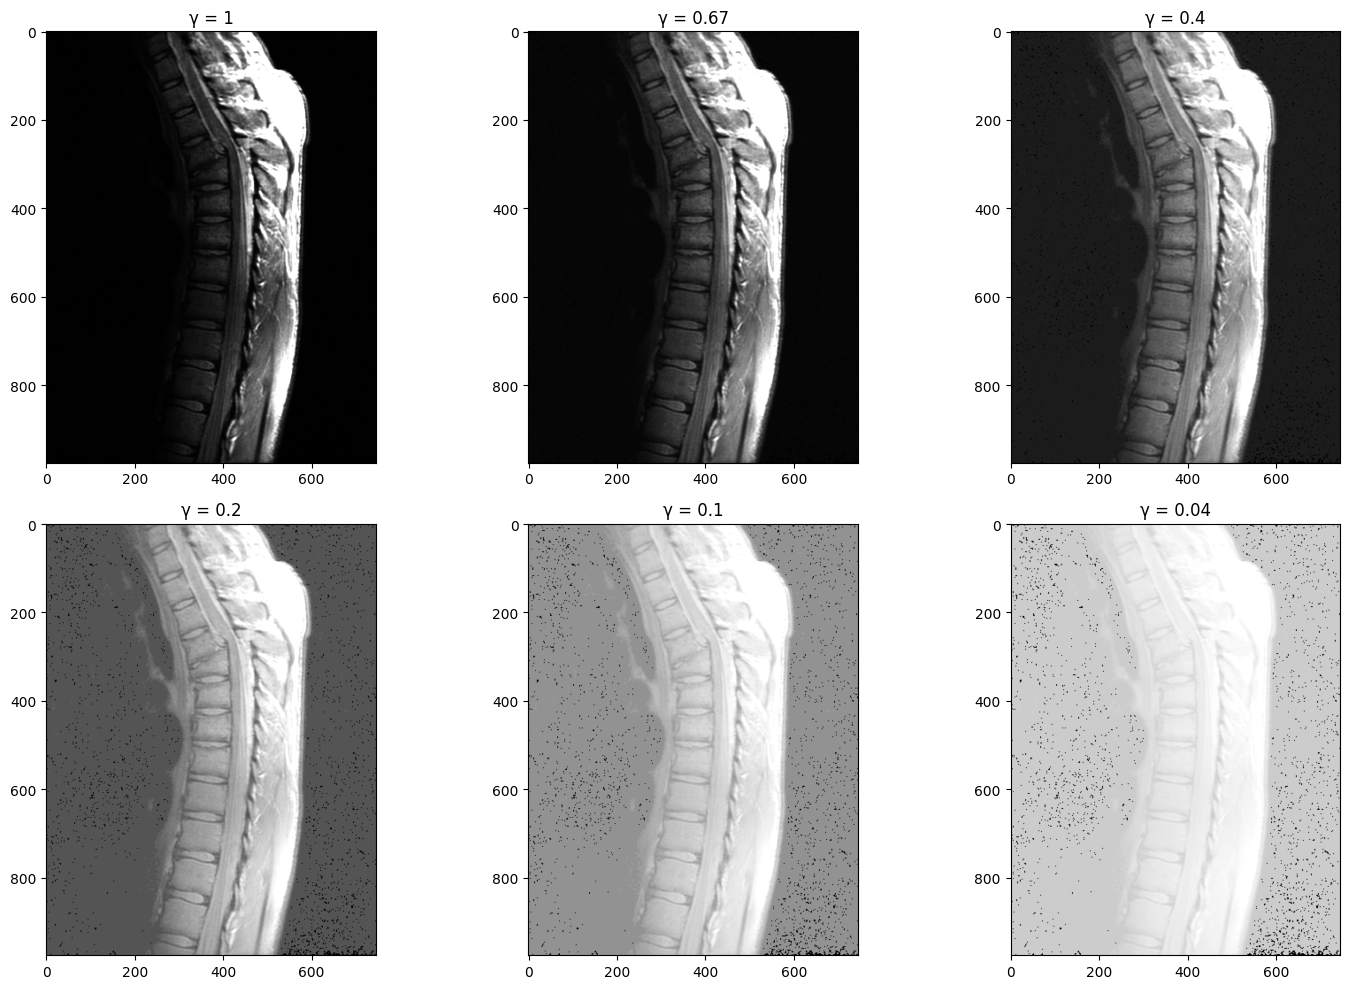

In [35]:
gammas = [1,0.67,0.40,0.20,0.10,0.04]
plt.figure(figsize=(15,10))

for pos,gamma in enumerate(gammas):
    transfomed_image = powerLawTransformation(original_image,gamma)
    
    plt.subplot(2,3,pos+1)
    plt.imshow(transfomed_image,cmap='gray')
    plt.title(f"γ = {gamma}")
plt.tight_layout()    
plt.show()    
    

### Power Law Transformation with $\gamma$>0

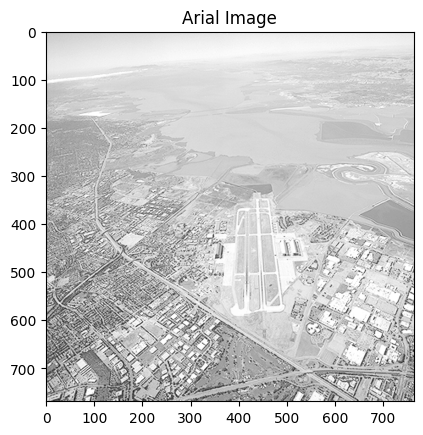

In [40]:
arialImage = cv2.imread('./images/Aerial_Image.tif',0)

plt.imshow(arialImage,cmap='gray')
plt.title('Arial Image')
plt.show()


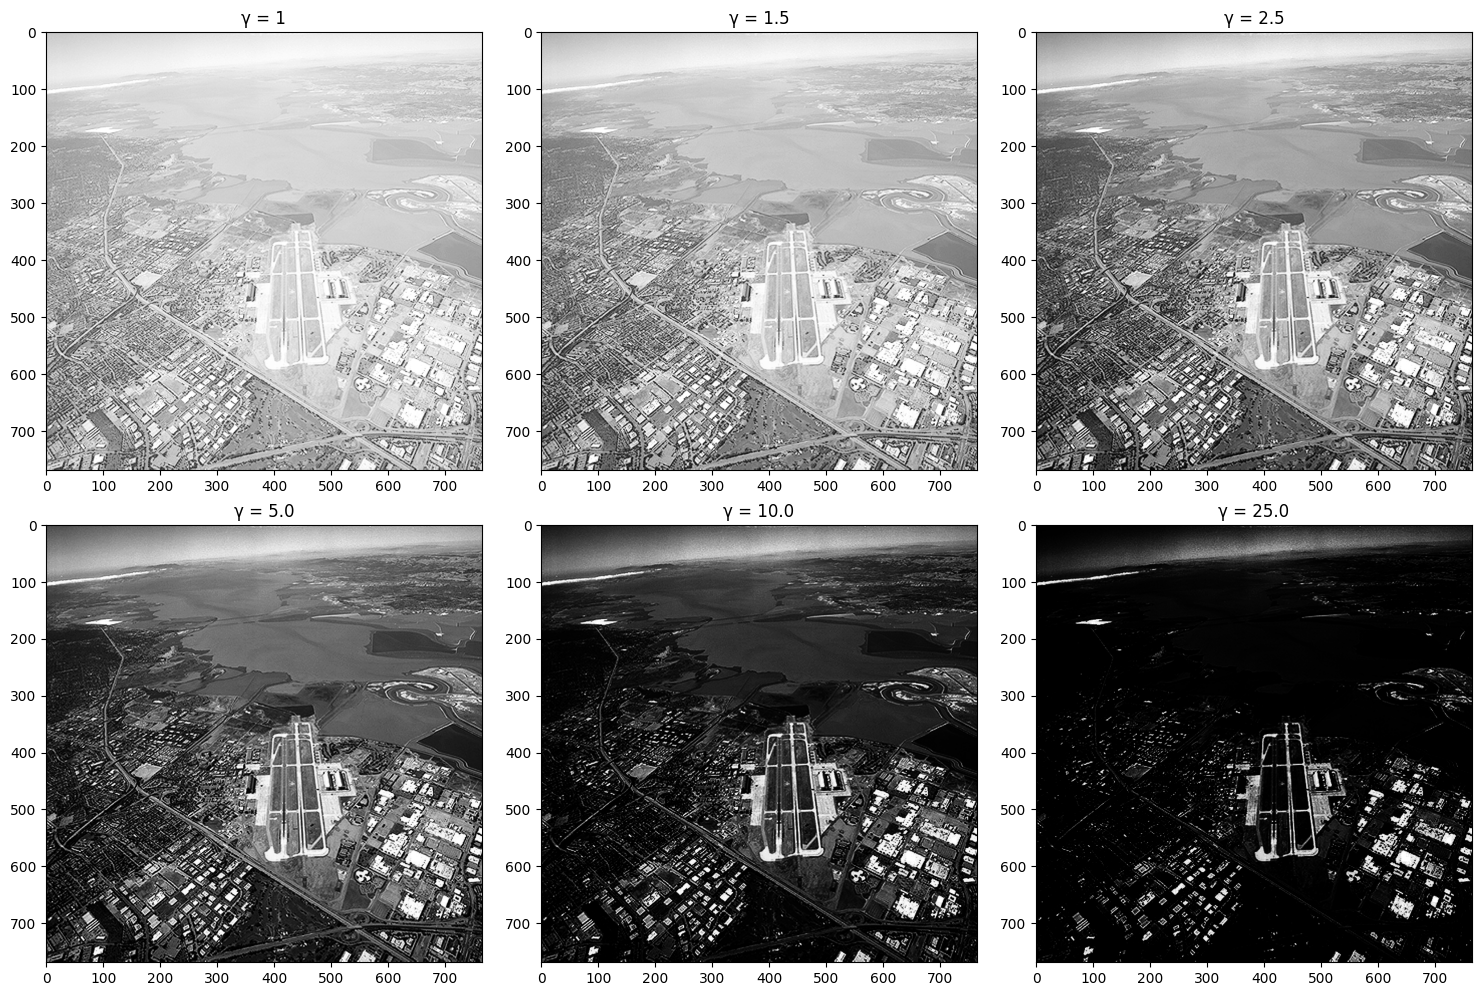

In [42]:
gammas = [1,1.5,2.5,5.0,10.0,25.0]
plt.figure(figsize=(15,10))

for pos,gamma in enumerate(gammas):
    transfomed_image = powerLawTransformation(arialImage,gamma)
    
    plt.subplot(2,3,pos+1)
    plt.imshow(transfomed_image,cmap='gray')
    plt.title(f"γ = {gamma}")
plt.tight_layout()    
plt.show()    
    

### Inverse Log Transformation function

In [45]:
def InverseLogTransformation(image):
    s,r = 255,255
    constant = s/np.log(1+r)
    transfomed_image = np.exp(image/constant) - 1
    
    return np.uint8(transfomed_image)

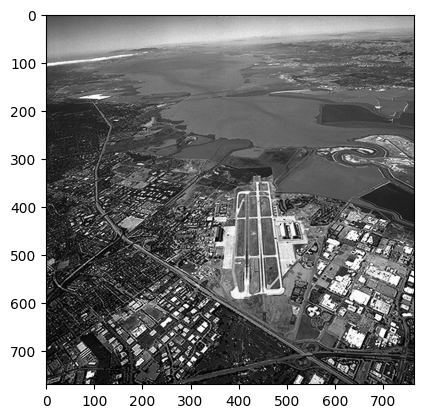

In [46]:
transfomed_image = InverseLogTransformation(arialImage)
plt.imshow(transfomed_image,cmap='gray')
plt.show()